Loading the IMDB dataset

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

Decoding reviews back to text

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data**

Encoding the integer sequences via multi-hot encoding

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building model**

Model definition

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


Compiling the model

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 60ms/step - loss: 0.5518 - accuracy: 0.7589 - val_loss: 0.4503 - val_accuracy: 0.8296
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3442 - accuracy: 0.8865 - val_loss: 0.3234 - val_accuracy: 0.8804
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2488 - accuracy: 0.9189 - val_loss: 0.2923 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2012 - accuracy: 0.9335 - val_loss: 0.2953 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1687 - accuracy: 0.9435 - val_loss: 0.2774 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1433 - accuracy: 0.9541 - val_loss: 0.2849 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1255 - accuracy: 0.9586 - val_loss: 0.3097 - val_accuracy: 0.8802
Epoch 8/20
30

Plotting the training and validation loss

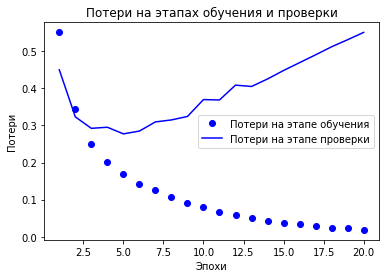

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

Plotting the training and validation accuracy

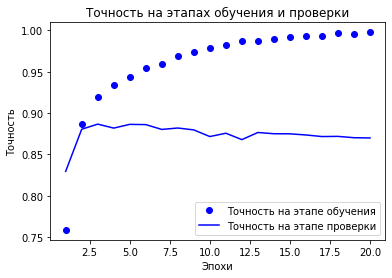

In [12]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()

Retraining a model from scratch



In [13]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4719 - accuracy: 0.8117
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2759 - accuracy: 0.9028
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2154 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8707


In [14]:
results

[0.3225947916507721, 0.8707200288772583]